In [148]:
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import NaN
from functions import * # import functions from the .py file

from pylab import rcParams
rcParams["figure.figsize"] = 16, 4

PAYLOADSIZE = 14

if PAYLOADSIZE % 2 != 0:
    print("Alarm! the payload size is not even.")
NUM_16RND = (PAYLOADSIZE-2)//2 # how many 16 bits random number included in each frame
MAX_SEQ = 256 # (decimal) maximum seq number defined by the length of the seq, the length of seq is 1B

## Log file

**For a fair comparison between groups, must follow the output format below**
<br>$\color{red}{\text{timestamp_rx }|\text{ len [hex] } \text{ seq [hex] } \text{ payload [hex] }|\text{rssi}}$
<br>$\text{ len [hex]}$ = payload length + 1 (seq. field length [1B])
<br>$\text{ payload [hex]}$ should start with the pseudo sequence number [2B], indicates the starting byte's position in the file.
***
*Example log file output for one frame with reciever timestamp xxxx, frame length, seq number and random payload, received signal strength.*
<br>15:17:18.394 |0f 46 bd f8 f7 ea 41 ac 1b be 05 a0 7f d2 09 d4 |  -91 CRC error
<br>$\color{red}{\text{delimiter for four variables is "|" and delimiter for the payload each byte is the space " ".}}$

#### Restore data

In [149]:
# define the file name
filename = "65k_12m_200_100"
# import file to jupyter notebook
df_read = readfile("./data/" + filename + ".txt")
# check the raw data first 10 lines
df_read.head(10)

,index,time_rx,rssi,seq,payload
0,0,2023-05-21 20:08:33.523,-103,0,00 00 00 7d 0c ba
1,1,2023-05-21 20:08:33.625,-104,10,08 02 08 6d 17 e5
2,2,2023-05-21 20:08:33.831,-106,72,10 04 00 87 fb 7e
3,3,2023-05-21 20:08:33.933,-107,0,02 80 01 3d fb 2e
4,4,2023-05-21 20:08:34.137,-103,1,28 80 00 00 30 5e
5,5,2023-05-21 20:08:34.238,-106,33,00 00 00 81 ac 97
6,6,2023-05-21 20:08:34.339,-104,1,00 10 04 ae c0 84
7,7,2023-05-21 20:08:34.544,-103,1,12 80 00 99 54 0b
8,8,2023-05-21 20:08:35.051,-107,10,24 00 00 54 86 bc
9,9,2023-05-21 20:08:35.155,-107,2,0a 20 00 7c c3 3e


In [150]:
# For debug
df_decode = df_read
df_decode['hex_payload'] = df_decode['payload'].apply(lambda x: format(int(x.replace(' ', ''), 16), 'x'))
print(df_decode['hex_payload'])

0            7d0cba
1       802086d17e5
2      10040087fb7e
3       280013dfb2e
4      28800000305e
           ...     
695          94877d
696    802000787fb0
697        2068b801
698          4f52d4
699      400091b7c8
Name: hex_payload, Length: 700, dtype: object


In [151]:
df_decode['decoded_payload'] = df_decode['hex_payload'].apply(lambda x: CorrectError(int(x.replace(' ', ''), 16)))

Remainder:  0
Remainder: 80208000000
Remainder: 100400000200
Remainder: 280000002e7
Remainder: 288000000000
Remainder:  0
Remainder: 1004000000
Remainder: 128000000000
Remainder: 240000000165
Remainder: a2000000000
Remainder: 372
Remainder: 4a42200001b9
Remainder: 10044000372
Remainder: 40a080000000
Remainder: 210200000040
Remainder: 8a000000100
Remainder: 800280000375
Remainder: 500840000067
Remainder: 2000040000b1
Remainder: a809000006e
Remainder: 880840000039
Remainder: 1002240002f1
Remainder: 140228000037
Remainder: 280000000000
Remainder: 40340002e7
Remainder: 100008000000
Remainder: 82000002e6
Remainder: 28424000004
Remainder: 8000371
Remainder: 111200000000
Remainder: 82100000233
Remainder: 14008000000
Remainder: 102004000002
Remainder: 508214000000
Remainder: 8400000077
Remainder: 505008000287
Remainder: 4008000000
Remainder: 900000035d
Remainder: 22094800039b
Remainder: 4008000318
Remainder: 114840000040
Remainder: 840000000077
Remainder: 848000020
Remainder: 8081040002c4
Rema

In [152]:
# After correct
print(df_decode['decoded_payload'])

0            7d0cba
1       802086d17e5
2      10040087fb7e
3       280013dfb2e
4      28800000305e
           ...     
695          94877d
696    802000787fb0
697        2068b801
698          4f52d4
699      400091b7c8
Name: decoded_payload, Length: 700, dtype: object


In [153]:
df_decode['restore_payload'] = df_decode['hex_payload'].apply(lambda x: RestoreRawData(int(x.replace(' ', ''), 16)))
print(df_decode['restore_payload'])
df_decode.head(575)

0      1f43
1      1b45
2      21fe
3      4f7e
4         c
       ... 
695    2521
696    1e1f
697    1a2e
698    13d4
699    246d
Name: restore_payload, Length: 700, dtype: object


,index,time_rx,rssi,seq,payload,hex_payload,decoded_payload,restore_payload
0,0,2023-05-21 20:08:33.523,-103,0,00 00 00 7d 0c ba,7d0cba,7d0cba,1f43
1,1,2023-05-21 20:08:33.625,-104,10,08 02 08 6d 17 e5,802086d17e5,802086d17e5,1b45
2,2,2023-05-21 20:08:33.831,-106,72,10 04 00 87 fb 7e,10040087fb7e,10040087fb7e,21fe
3,3,2023-05-21 20:08:33.933,-107,0,02 80 01 3d fb 2e,280013dfb2e,280013dfb2e,4f7e
4,4,2023-05-21 20:08:34.137,-103,1,28 80 00 00 30 5e,28800000305e,28800000305e,c
...,...,...,...,...,...,...,...,...
570,570,2023-05-21 20:13:26.818,-109,104,82 05 00 9e 9d 3b,8205009e9d3b,8205009e9d3b,27a7
571,571,2023-05-21 20:13:27.537,-109,105,51 14 09 75 9a b2,511409759ab2,511409759ab2,5d66
572,572,2023-05-21 20:13:34.355,-113,53,12 15 04 95 dd 87,12150495dd87,12150495dd87,2577
573,573,2023-05-21 20:13:34.764,-109,114,a1 04 50 45 69 5e,a1045045695e,a1045045695e,115a


In [154]:
# Convert payload column to string type
df_decode['string_payload'] = df_decode['restore_payload'].astype(str)

# Define custom function to format payload values
def format_payload(payload):
    # Remove spaces and split into pairs of characters
    payload = payload.replace(' ', '')
    
    # Add leading zeros if the length is odd
    if len(payload) % 2 != 0:
        payload = '0' + payload
    
    # Split into pairs of characters
    formatted_payload = [payload[i:i+2] for i in range(0, len(payload), 2)]
    
    # Insert space between every two characters
    formatted_payload = ' '.join(formatted_payload)
    
    return formatted_payload

# Apply format_payload function to restore_payload column
df_decode['formatted_payload'] = df_decode['string_payload'].apply(format_payload)

# Output the result
#df_decode.head(23)

# Output the result

print(df_decode['formatted_payload'])

0      1f 43
1      1b 45
2      21 fe
3      4f 7e
4         0c
       ...  
695    25 21
696    1e 1f
697    1a 2e
698    13 d4
699    24 6d
Name: formatted_payload, Length: 700, dtype: object


In [155]:
df = pd.DataFrame(columns=['index', 'time_rx', 'rssi', 'seq', 'payload'])

# Grouped by 'seq'
grouped = df_decode.groupby('seq')

# Regroup payload
rows = []
index = 0
for seq, group in grouped:
    formatted_payloads = group['formatted_payload'].tolist()
    
    # Check formatted_payload 
    for i in range(len(formatted_payloads)):
        if len(formatted_payloads[i]) == 1:
            formatted_payloads[i] = '00 ' + formatted_payloads[i]
        elif len(formatted_payloads[i]) == 2 and formatted_payloads[i] <= 'ff':
            formatted_payloads[i] = '00 ' + formatted_payloads[i]
    
    payload = ' '.join(formatted_payloads)
    
    # Check if need add "00"
    payload_size = len(payload.split(' '))
    if payload_size < 14:
        payload += ' 00' * (14 - payload_size)
    
    rows.append({
        'index': index,
        'time_rx': group['time_rx'].iloc[-1],
        'rssi': group['rssi'].iloc[-1],
        'seq': seq,
        'payload': payload
    })
    
    index += 1

# Put the rows to new dataframe df
df = pd.concat([df, pd.DataFrame(rows)], ignore_index=True)

# Tuen rssi into datatype 'int'
df['rssi'] = df['rssi'].astype(int)

# Reset index
df.reset_index(drop=True, inplace=True)

# If length larger than 100, then cut it off.
if len(df) > 100:
    df = df[:100]

# Check output
df.head(100)

,index,time_rx,rssi,seq,payload
0,0,2023-05-21 20:12:02.489,-103,0,1f 43 4f 7e 0e 34 00 00 00 00 00 00 00 00
1,1,2023-05-21 20:12:03.208,-106,1,00 0c 2b b0 26 55 22 ad 00 00 00 00 00 00
2,2,2023-05-21 20:12:03.814,-107,2,1f 30 12 68 24 9d 00 00 00 00 00 00 00 00
3,3,2023-05-21 20:08:36.070,-109,3,25 4e 00 00 00 00 00 00 00 00 00 00 00 00
4,4,2023-05-21 20:12:18.176,-104,4,0d f0 00 00 00 00 00 00 00 00 00 00 00 00
...,...,...,...,...,...
100,100,2023-05-21 20:10:05.073,-104,112,22 98 22 8a 22 45 00 00 00 00 00 00 00 00
101,101,2023-05-21 20:13:35.274,-106,114,11 5a 2d ec 2d 34 00 00 00 00 00 00 00 00
102,102,2023-05-21 20:13:36.190,-106,115,18 e0 00 00 00 00 00 00 00 00 00 00 00 00
103,103,2023-05-21 20:13:11.538,-104,117,85 70 20 38 00 00 00 00 00 00 00 00 00 00


In [156]:
# delete the corrupted packets (PAYLOADSIZE + 2B pesudo sequence number)
#df = df[df.payload.apply(lambda x: len(x)==((PAYLOADSIZE)*3-1))]
#df.reset_index(inplace=True)

In [157]:
# replace the resettable seq number to unresettable, for the purpose of reliability calculation
#test = replace_seq(df.copy(), MAX_SEQ=256)
#test.rename(columns = {'seq':'old_seq', 'new_seq':'seq'}, inplace = True)

# Time

## Definition

**Evaluation metric**
<br>*File Transmission Time: the total latency that certain amount of Data $F$ is delivered to the destination.*
<br> $File\ Delay = Rx\_timestamp[N] - Rx\_timestamp[0]$
<br> where $N$ is the last packet
***
**Interesting to look at**:
<br>*Timestamp difference*: $\Delta T[i] = Rx\_timestamp[i] - Tx\_timestamp[i]$
1. *Worst-case packet delay*: the delay of the packet that takes the longest time to traverse.
2. *Packet delay variation*: the std of the packet delay.

In [158]:
# compute the file delay
file_delay = df.time_rx[len(df) - 1] - df.time_rx[0]
# convert the timedelta to s
file_delay_s = np.timedelta64(file_delay, "ms").astype(int) / 1000
print(f"The time it takes to transfer the file is : {file_delay}, which is {file_delay_s} seconds.")

The time it takes to transfer the file is : -1 days +23:59:58.682000, which is -1.318 seconds.


# Reliability

## Definition

**Evaluation metric**
<br>*Quality of data transfer.*
<br>*Bit Reliability*: The ratio of data bits correctly delivered to the data sink.
<br>*Bit Error Rate*: The ratio of data bits incorrectly delivered to the data sink.
$$Bit\ Reliability = 1 - BER = 1 - \frac{Number\ of\ wrong\ bit}{Total\ Number\ of\ bit\ sent}$$
***
**Interesting to look at**:
1. *Expected number of transmission*: the ratio of the number of packets correctly received by the data sink and the number of packets sent by the source.

$$ETX = \frac{Number\ of\ packet\ received}{Number\ of\ packet\ sent}$$

2. *Packet reliability*: the number of packet bit correctly delivered to next hop.

## Statistics

In [159]:
# compute the BER for all received packets
# return the in total ber for received file, error statistics and correct file content supposed to be transmitted
ber, error, file_content = compute_ber(df, PACKET_LEN=NUM_16RND*2, MAX_SEQ=MAX_SEQ)
bit_reliability = (1-ber)*100
print(f"Bit reliability [%]: {bit_reliability}")

211
The total number of packets transmitted by the tag is 256.
Error statistics dataframe is:
     seq bit_error_tmp  bit_error
0      0          [40]         40
1      1          [44]         44
2      2          [37]         37
3      3          [46]         46
4      4          [42]         42
..   ...           ...        ...
251  251            []         96
252  252            []         96
253  253          [36]         36
254  254          [27]         27
255  255          [33]         33

[256 rows x 3 columns]
Bit reliability [%]: 46.565755208333336


In [160]:
packets = len(df)
print(df.seq[packets-1])

255


In [161]:
# payload example for debug purpose
# correct sequence for pesudoseq NO. '0000'
tmp = file_content.loc[int('0000', base=16), 'data']
for i in tmp:
    print("{:02x}".format(i), end=" ")

13 5d 1f 43 1b 45 25 6f 21 fe 0f 7e 

Text(0.5, 0, 'Seq. Number')

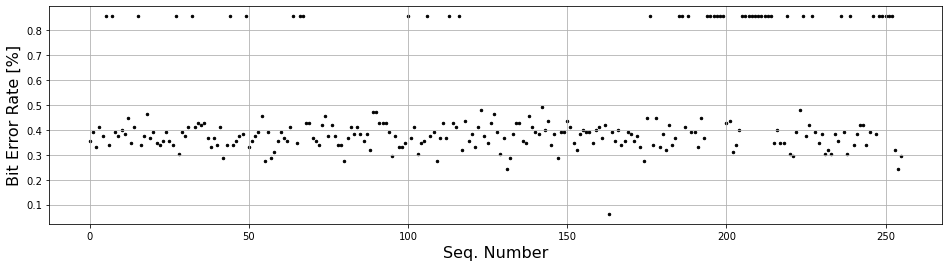

In [162]:
# BER for each packet
plt.scatter(error.seq, error.bit_error/(PAYLOADSIZE*8), marker='o', s=6, color='black')
plt.grid()
plt.ylabel('Bit Error Rate [%]', fontsize=16)
plt.xlabel('Seq. Number', fontsize=16)

# Distance

## Definition

**The communication distance of the system.**
<br>$D_{1}$: the distance between carrier<->backscatter_tag[m]
<br>$D_{2}$: the distance between backscatter_tag<->receiver[m]
<br> Distance metric = $D_{1}^2D_{2}^2$
<br>

In [163]:
# record the distance
dis_carrier_tag = 1
dis_tag_rx = 12

dis_metric = dis_carrier_tag**2*dis_tag_rx**2
print(f"Distance metric is: {dis_metric}")

Distance metric is: 144


# Radarplot

**Please pay attention to the unit**
<br> <font color='red'>Time</font>: use second as unit
<br> <font color='red'>Reliability</font>: use the percent as unit
<br> <font color='red'>Distance</font>: use meter as unit
<br>**Metics = [Time(s), Reliability(%), Distance(m)]**
<br> <font color='red'>Always keep the reference in your plot.</font>
<br> Tips: for ploting, time metric uses $\frac{1}{Time}*1000$ as the time metric, the higher the value the better the system performance

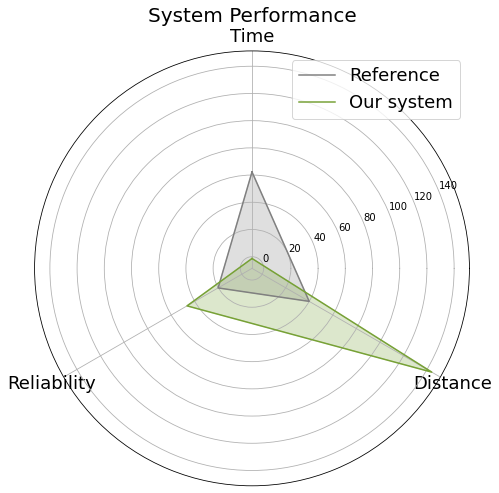

In [164]:
metrics = [file_delay_s, bit_reliability, dis_metric]
radar_plot(metrics)